In [694]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

import category_encoders
from category_encoders import TargetEncoder

Loading CSVs
==

In [695]:
d_city = pd.read_csv('../data/diamonds_city.csv')
d_clarity = pd.read_csv('../data/diamonds_clarity.csv')
d_color = pd.read_csv('../data/diamonds_color.csv')
d_cut = pd.read_csv('../data/diamonds_cut.csv')
d_dimensions = pd.read_csv('../data/diamonds_dimensions.csv')
d_properties = pd.read_csv('../data/diamonds_properties.csv')
d_transactional = pd.read_csv('../data/diamonds_transactional.csv')
d_test = pd.read_csv('../data/diamonds_test.csv')

In [696]:
diamonds = d_dimensions.merge(d_properties, how='inner', on='index_id')
diamonds = diamonds.merge(d_cut, how='inner', on='cut_id')
diamonds = diamonds.merge(d_color, how='inner', on='color_id')
diamonds = diamonds.merge(d_clarity, how='inner', on='clarity_id')
diamonds = diamonds.merge(d_transactional, how='inner', on='index_id')
diamonds = diamonds.merge(d_city, how='inner', on='city_id')
diamonds = diamonds.drop(columns=['cut_id', 'color_id', 'clarity_id', 'city_id'])
diamonds

,index_id,depth,table,x,y,z,cut,color,clarity,price,carat,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2,4268,1.21,Kimberly
1,248aa2bdd0032920ac9e5f6ad36c350549da067efeaf7b...,60.8,60.0,6.85,6.89,4.18,Premium,J,VS2,4839,1.20,Kimberly
2,72b31cf00f8ab3967588fad4a32f61622cb162f9b7bc2c...,60.6,59.0,4.34,4.38,2.64,Premium,J,VS2,368,0.30,Kimberly
3,98c53df687f2e9b94da80eef5b9049f1fac456b4c41c80...,62.6,57.0,6.80,6.72,4.23,Premium,J,VS2,5053,1.20,Kimberly
4,5dfe43a321c6834c7de273c73aeadc705d919a5869e0f5...,59.4,62.0,6.66,6.58,3.93,Premium,J,VS2,3593,1.05,Kimberly
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,e03a231c5b52635043e7dc5f0c6c9f16722e14dbcc98bb...,61.8,56.0,4.42,4.46,2.74,Ideal,F,IF,978,0.33,Zurich
40451,90dcb905e13140ff99770039b843fb62fb179ab4a3bae9...,61.6,56.0,4.43,4.47,2.74,Ideal,F,IF,929,0.32,Zurich
40452,97d3c3344c245422ee7fa4f448b2cace9940121620df22...,62.4,55.0,4.20,4.17,2.61,Ideal,F,IF,828,0.28,Zurich
40453,e4dc4e0761ccc6fbb4c064517e40f3582522c325f9a4e5...,62.0,58.0,6.44,6.49,4.01,Ideal,F,IF,11116,1.02,Zurich


In [697]:
diamonds

,index_id,depth,table,x,y,z,cut,color,clarity,price,carat,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2,4268,1.21,Kimberly
1,248aa2bdd0032920ac9e5f6ad36c350549da067efeaf7b...,60.8,60.0,6.85,6.89,4.18,Premium,J,VS2,4839,1.20,Kimberly
2,72b31cf00f8ab3967588fad4a32f61622cb162f9b7bc2c...,60.6,59.0,4.34,4.38,2.64,Premium,J,VS2,368,0.30,Kimberly
3,98c53df687f2e9b94da80eef5b9049f1fac456b4c41c80...,62.6,57.0,6.80,6.72,4.23,Premium,J,VS2,5053,1.20,Kimberly
4,5dfe43a321c6834c7de273c73aeadc705d919a5869e0f5...,59.4,62.0,6.66,6.58,3.93,Premium,J,VS2,3593,1.05,Kimberly
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,e03a231c5b52635043e7dc5f0c6c9f16722e14dbcc98bb...,61.8,56.0,4.42,4.46,2.74,Ideal,F,IF,978,0.33,Zurich
40451,90dcb905e13140ff99770039b843fb62fb179ab4a3bae9...,61.6,56.0,4.43,4.47,2.74,Ideal,F,IF,929,0.32,Zurich
40452,97d3c3344c245422ee7fa4f448b2cace9940121620df22...,62.4,55.0,4.20,4.17,2.61,Ideal,F,IF,828,0.28,Zurich
40453,e4dc4e0761ccc6fbb4c064517e40f3582522c325f9a4e5...,62.0,58.0,6.44,6.49,4.01,Ideal,F,IF,11116,1.02,Zurich


Features
==

In [698]:
def super_feature(df):
    return  (df['carat'] / df['table'] * df['depth'])
def super_feature2(df):

    x = df['x']*df['y']

    return np.where(x != np.inf , x, 43)

diamonds['super_feature'] = super_feature(diamonds)
#diamonds['super_feature2'] = super_feature2(diamonds)

diamonds

,index_id,depth,table,x,y,z,cut,color,clarity,price,carat,city,super_feature
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2,4268,1.21,Kimberly,1.301793
1,248aa2bdd0032920ac9e5f6ad36c350549da067efeaf7b...,60.8,60.0,6.85,6.89,4.18,Premium,J,VS2,4839,1.20,Kimberly,1.216000
2,72b31cf00f8ab3967588fad4a32f61622cb162f9b7bc2c...,60.6,59.0,4.34,4.38,2.64,Premium,J,VS2,368,0.30,Kimberly,0.308136
3,98c53df687f2e9b94da80eef5b9049f1fac456b4c41c80...,62.6,57.0,6.80,6.72,4.23,Premium,J,VS2,5053,1.20,Kimberly,1.317895
4,5dfe43a321c6834c7de273c73aeadc705d919a5869e0f5...,59.4,62.0,6.66,6.58,3.93,Premium,J,VS2,3593,1.05,Kimberly,1.005968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,e03a231c5b52635043e7dc5f0c6c9f16722e14dbcc98bb...,61.8,56.0,4.42,4.46,2.74,Ideal,F,IF,978,0.33,Zurich,0.364179
40451,90dcb905e13140ff99770039b843fb62fb179ab4a3bae9...,61.6,56.0,4.43,4.47,2.74,Ideal,F,IF,929,0.32,Zurich,0.352000
40452,97d3c3344c245422ee7fa4f448b2cace9940121620df22...,62.4,55.0,4.20,4.17,2.61,Ideal,F,IF,828,0.28,Zurich,0.317673
40453,e4dc4e0761ccc6fbb4c064517e40f3582522c325f9a4e5...,62.0,58.0,6.44,6.49,4.01,Ideal,F,IF,11116,1.02,Zurich,1.090345


In [699]:
diamonds['cut'].unique()

array(['Premium', 'Very Good', 'Fair', 'Good', 'Ideal'], dtype=object)

In [700]:
x_columns = ['depth', 'table','cut', 'color', 'clarity', 'carat', 'super_feature']
X = diamonds[x_columns]

y = diamonds['price']

In [701]:
diamonds_noid = diamonds.drop(columns=['index_id', 'city'])


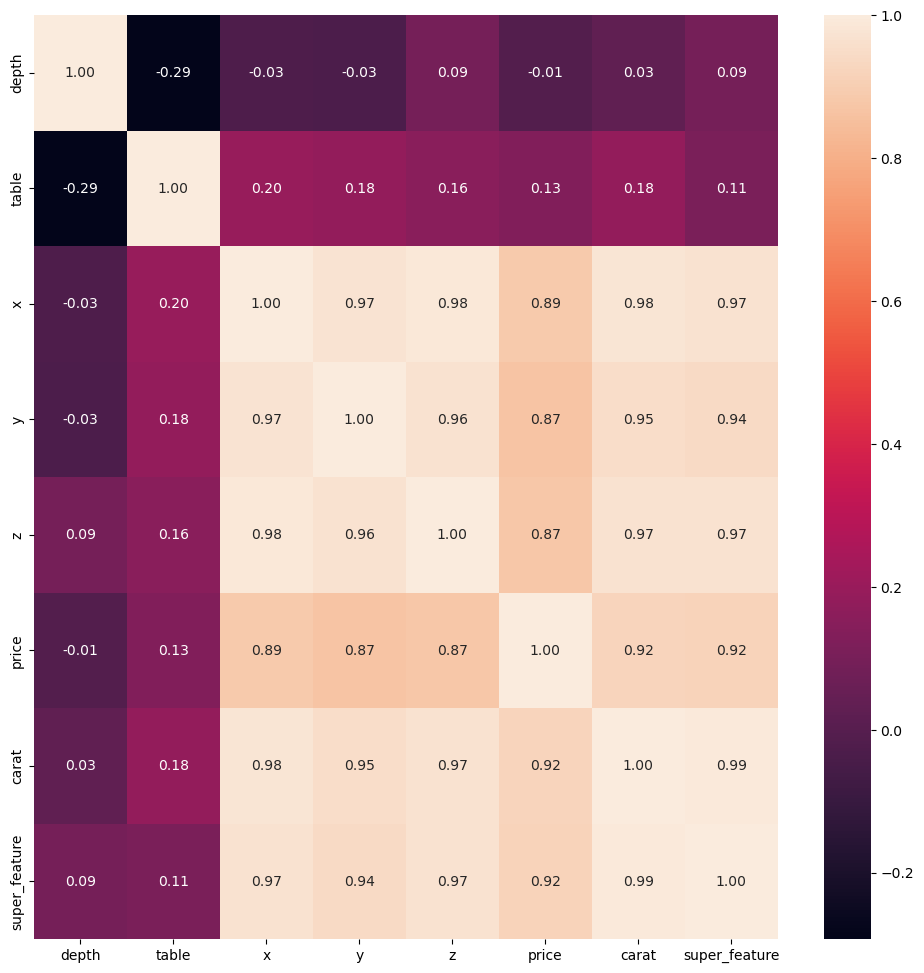

In [702]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(diamonds_noid.corr(method='pearson'), annot=True, fmt='.2f', ax=ax);

In [611]:
selector = VarianceThreshold(threshold=0.0)
new_X = selector.fit_transform(X_encoding)
print("Transformed feature shape:", new_X.shape)

# Selected features
print("Selected features:", selector.get_feature_names_out())

Transformed feature shape: (40455, 21)
Selected features: ['depth' 'table' 'carat' 'super_feature' 'cut_Good' 'cut_Ideal'
 'cut_Premium' 'cut_Very Good' 'color_E' 'color_F' 'color_G' 'color_H'
 'color_I' 'color_J' 'clarity_IF' 'clarity_SI1' 'clarity_SI2'
 'clarity_VS1' 'clarity_VS2' 'clarity_VVS1' 'clarity_VVS2']


Encoding
==

In [612]:
X_encoding = pd.get_dummies(X, columns=[ 'cut', 'color', 'clarity'], drop_first=True)
X_encoding

,depth,table,carat,super_feature,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,62.4,58.0,1.21,1.301793,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,60.8,60.0,1.20,1.216000,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,60.6,59.0,0.30,0.308136,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,62.6,57.0,1.20,1.317895,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,59.4,62.0,1.05,1.005968,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,61.8,56.0,0.33,0.364179,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
40451,61.6,56.0,0.32,0.352000,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
40452,62.4,55.0,0.28,0.317673,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
40453,62.0,58.0,1.02,1.090345,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [613]:
encoder = TargetEncoder()

/Users/pedroconsuegramateo/opt/miniconda3/envs/m3_ih/lib/python3.10/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/Users/pedroconsuegramateo/opt/miniconda3/envs/m3_ih/lib/python3.10/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [614]:
X

,depth,table,cut,color,clarity,carat,super_feature
0,62.4,58.0,Premium,J,VS2,1.21,1.301793
1,60.8,60.0,Premium,J,VS2,1.20,1.216000
2,60.6,59.0,Premium,J,VS2,0.30,0.308136
3,62.6,57.0,Premium,J,VS2,1.20,1.317895
4,59.4,62.0,Premium,J,VS2,1.05,1.005968
...,...,...,...,...,...,...,...
40450,61.8,56.0,Ideal,F,IF,0.33,0.364179
40451,61.6,56.0,Ideal,F,IF,0.32,0.352000
40452,62.4,55.0,Ideal,F,IF,0.28,0.317673
40453,62.0,58.0,Ideal,F,IF,1.02,1.090345


In [616]:
def myEncoding(df):
    return pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

In [626]:
cutValues = diamonds['cut'].unique()
cutValues

array(['Premium', 'Very Good', 'Fair', 'Good', 'Ideal'], dtype=object)

In [636]:
colorValues = diamonds['color'].unique()
colorValues

array(['J', 'E', 'I', 'G', 'D', 'H', 'F'], dtype=object)

In [669]:
diamonds['clarity'].unique()

array(['VS2', 'VVS2', 'SI1', 'VS1', 'SI2', 'I1', 'VVS1', 'IF'],
      dtype=object)

In [703]:
cut_encoding = {'Premium':4, 'Very Good':3, 'Fair':2, 'Good': 1, 'Ideal':0}
def labelEncodingForCut(x):
    for key in cut_encoding:
        if x == key:
            return cut_encoding[key]

In [704]:
color_encoding = {'J':6, 'I':5, 'H':4, 'G': 3, 'F':2, 'E':1, 'D':0}
def labelEncodingForColor(x):
    for key in color_encoding:
        if x == key:
            return color_encoding[key]

In [705]:
clarity_encoding = {'I1':7, 'SI2':6, 'SI1':5, 'VS2': 4, 'VS1':3, 'VVS2':2, 'VVS1':1, 'IF':0}
def labelEncodingForClarity(x):
    for key in clarity_encoding:
        if x == key:
            return clarity_encoding[key]

In [706]:
X['cut'] = X['cut'].apply(labelEncodingForCut)
X

/var/folders/n3/xb6jll3d49q147jw5_13y6zm0000gn/T/ipykernel_7315/2931406157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cut'] = X['cut'].apply(labelEncodingForCut)


,depth,table,cut,color,clarity,carat,super_feature
0,62.4,58.0,4,J,VS2,1.21,1.301793
1,60.8,60.0,4,J,VS2,1.20,1.216000
2,60.6,59.0,4,J,VS2,0.30,0.308136
3,62.6,57.0,4,J,VS2,1.20,1.317895
4,59.4,62.0,4,J,VS2,1.05,1.005968
...,...,...,...,...,...,...,...
40450,61.8,56.0,0,F,IF,0.33,0.364179
40451,61.6,56.0,0,F,IF,0.32,0.352000
40452,62.4,55.0,0,F,IF,0.28,0.317673
40453,62.0,58.0,0,F,IF,1.02,1.090345


In [707]:
X['color']

0        J
1        J
2        J
3        J
4        J
        ..
40450    F
40451    F
40452    F
40453    F
40454    F
Name: color, Length: 40455, dtype: object

In [708]:
X['color'] = X['color'].apply(labelEncodingForColor)
X

/var/folders/n3/xb6jll3d49q147jw5_13y6zm0000gn/T/ipykernel_7315/1291655416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['color'] = X['color'].apply(labelEncodingForColor)


,depth,table,cut,color,clarity,carat,super_feature
0,62.4,58.0,4,6,VS2,1.21,1.301793
1,60.8,60.0,4,6,VS2,1.20,1.216000
2,60.6,59.0,4,6,VS2,0.30,0.308136
3,62.6,57.0,4,6,VS2,1.20,1.317895
4,59.4,62.0,4,6,VS2,1.05,1.005968
...,...,...,...,...,...,...,...
40450,61.8,56.0,0,2,IF,0.33,0.364179
40451,61.6,56.0,0,2,IF,0.32,0.352000
40452,62.4,55.0,0,2,IF,0.28,0.317673
40453,62.0,58.0,0,2,IF,1.02,1.090345


In [709]:
X['clarity'] = X['clarity'].apply(labelEncodingForClarity)
X

/var/folders/n3/xb6jll3d49q147jw5_13y6zm0000gn/T/ipykernel_7315/1828486422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clarity'] = X['clarity'].apply(labelEncodingForClarity)


,depth,table,cut,color,clarity,carat,super_feature
0,62.4,58.0,4,6,4,1.21,1.301793
1,60.8,60.0,4,6,4,1.20,1.216000
2,60.6,59.0,4,6,4,0.30,0.308136
3,62.6,57.0,4,6,4,1.20,1.317895
4,59.4,62.0,4,6,4,1.05,1.005968
...,...,...,...,...,...,...,...
40450,61.8,56.0,0,2,0,0.33,0.364179
40451,61.6,56.0,0,2,0,0.32,0.352000
40452,62.4,55.0,0,2,0,0.28,0.317673
40453,62.0,58.0,0,2,0,1.02,1.090345


Scaling
==

In [710]:
def scaling(df):
    
    #scaler = MinMaxScaler()
    #scaler = StandardScaler()
    scaler = RobustScaler()
    scaling = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaling)
    
    return scaled_df

In [711]:
x_scaling = scaling(X)
x_scaling

,0,1,2,3,4,5,6
0,0.400000,0.333333,0.5,1.000000,0.0,0.796875,0.770402
1,-0.666667,1.000000,0.5,1.000000,0.0,0.781250,0.650007
2,-0.800000,0.666667,0.5,1.000000,0.0,-0.625000,-0.624016
3,0.533333,0.000000,0.5,1.000000,0.0,0.781250,0.792998
4,-1.600000,1.666667,0.5,1.000000,0.0,0.546875,0.355265
...,...,...,...,...,...,...,...
40450,0.000000,-0.333333,-0.5,-0.333333,-2.0,-0.578125,-0.545369
40451,-0.133333,-0.333333,-0.5,-0.333333,-2.0,-0.593750,-0.562460
40452,0.400000,-0.666667,-0.5,-0.333333,-2.0,-0.656250,-0.610632
40453,0.133333,0.333333,-0.5,-0.333333,-2.0,0.500000,0.473673


Train, Test, Split
==

In [712]:
X_train, X_test, y_train, y_test = train_test_split(x_scaling, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (32364, 7), X_test: (8091, 7), y_train: (32364,), y_test: (8091,)


In [118]:
#regressor = LinearRegression()
#regressor = RandomForestRegressor()
#regressor = SVR(gamma=3)
regressor = XGBRegressor()
hyperparameters = regressor.get_params()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Model:', regressor, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
print('Ground truth target:', y_test, '\n')
print('Predicted target:', y_pred, '\n')

Model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 

Model hyperparameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': None, 'gpu_id': None

Predictions
==

In [713]:

d_test['super_feature'] = super_feature(d_test)
#d_test['super_feature2'] = super_feature2(d_test)

d_test = d_test[x_columns]
d_test['cut'] = d_test['cut'].apply(labelEncodingForCut)
d_test['color'] = d_test['color'].apply(labelEncodingForColor)
d_test['clarity'] = d_test['clarity'].apply(labelEncodingForClarity)
x_pred = scaling(d_test)

#x_pred = myEncoding(d_test)
#x_pred = scaling(x_pred)
d_test

,depth,table,cut,color,clarity,carat,super_feature
0,62.7,60.0,3,2,5,0.79,0.825550
1,61.0,57.0,0,6,3,1.20,1.284211
2,62.2,61.0,4,4,5,1.57,1.600885
3,63.8,54.0,3,2,5,0.90,1.063333
4,62.9,58.0,3,2,3,0.50,0.542241
...,...,...,...,...,...,...,...
13480,61.9,56.0,0,1,5,0.57,0.630054
13481,62.2,55.0,0,5,4,0.71,0.802945
13482,61.6,55.0,0,2,3,0.70,0.784000
13483,58.8,57.0,3,2,6,0.70,0.722105


In [716]:
d_predictions = regressor.predict(x_pred).clip(0, 30000)
d_predictions

array([2702.451 , 5733.2974, 9640.984 , ..., 3375.2603, 2103.3306,
        887.6788], dtype=float32)

In [717]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

525.2075715430407

In [718]:

predictions = pd.DataFrame(d_predictions).rename(columns={0:'price'})
predictions.index.names = ['id']
predictions

,price
id,
0,2702.450928
1,5733.297363
2,9640.984375
3,3903.527588
4,1615.243164
...,...
13480,1662.604614
13481,2423.002441
13482,3375.260254


In [719]:
predictions.to_csv('../results/predictions.csv')

In [720]:
r2 = r2_score(y_test, y_pred)
r2

0.9821329550817861

## Hyperparameter Tunning and Cross Validation
---

In [125]:
gridsearch_params = {
    (max_depth, min_child_weight, subsample, colsample, eta)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
    for eta in [.3, .2, .1, .05, .01, .005]
}

In [206]:
param_grid = {'min_child_weight': [i for i in range(9,12)],
              'max_depth': [i for i in range(4,7)],
             'subsample': [i/10. for i in range(7,11)],
              'learning_rate:':[0.05, 0.1, 0.15, 0.2, 0.3],
             'eta': [.3, .2, .1, .05, .01, .005]}


In [207]:
param_grid

{'min_child_weight': [9, 10, 11],
 'max_depth': [4, 5, 6],
 'subsample': [0.7, 0.8, 0.9, 1.0],
 'learning_rate:': [0.05, 0.1, 0.15, 0.2, 0.3],
 'eta': [0.3, 0.2, 0.1, 0.05, 0.01, 0.005]}

In [216]:
grid_search = RandomizedSearchCV(regressor,
                           param_grid,
                           cv=5,
                           verbose=3,
                           scoring='neg_root_mean_squared_error',
                           error_score='raise',
                           
                           n_jobs=-1)

In [286]:
param_grid_grid_search = {'learning_rate:':[0.05, 0.1, 0.15, 0.2, 0.3]}
param_grid_grid_search2 = {'gamma':[i/10.0 for i in range(0,5)]}
param_grid_grid_search3 = {'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2)}
param_grid_grid_search4 = {'colsample_bytree':[i/10.0 for i in range(5,10)]}
param_grid_grid_search5 = {'gamma':[i/10.0 for i in range(0,5)]}


In [622]:
grid_search = GridSearchCV(regressor,
                           param_grid_grid_search5,
                           cv=5,
                           verbose=3,
                           scoring='neg_root_mean_squared_error',
                           error_score='raise',
                           
                           n_jobs=-1)

In [623]:
%%time

grid_search.fit(x_scaling,y)

print('\n')
print('Best hyperparameters: ', grid_search.best_params_, '\n')
print('Best score: ', -grid_search.best_score_, '\n')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/pedroconsuegramateo/opt/miniconda3/envs/m3_ih/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/pedroconsuegramateo/opt/miniconda3/envs/m3_ih/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/pedroconsuegramateo/opt/miniconda3/envs/m3_ih/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/pedroconsuegramateo/opt/miniconda3/envs/m3_ih/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumP



Best hyperparameters:  {'gamma': 0.0} 

Best score:  597.2812625710418 

CPU times: user 10.2 s, sys: 3.08 s, total: 13.3 s
Wall time: 19.3 s
[CV 3/5] END ......................gamma=0.0;, score=-601.610 total time=   4.3s
[CV 5/5] END ......................gamma=0.1;, score=-605.466 total time=   4.3s
[CV 2/5] END ......................gamma=0.3;, score=-578.050 total time=   4.4s
[CV 1/5] END ......................gamma=0.0;, score=-584.649 total time=   4.4s
[CV 3/5] END ......................gamma=0.2;, score=-601.610 total time=   4.3s
[CV 1/5] END ......................gamma=0.4;, score=-584.649 total time=   4.4s
[CV 4/5] END ......................gamma=0.0;, score=-616.632 total time=   4.3s
[CV 1/5] END ......................gamma=0.2;, score=-584.649 total time=   4.3s
[CV 5/5] END ......................gamma=0.3;, score=-605.466 total time=   4.4s
[CV 2/5] END ......................gamma=0.0;, score=-578.050 total time=   4.3s
[CV 4/5] END ......................gamma=0.1;,

In [210]:
%%time

grid_search.fit(x_scaling,y)

print('\n')
print('Best hyperparameters: ', grid_search.best_params_, '\n')
print('Best score: ', -grid_search.best_score_, '\n')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[09:49:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "learning_rate:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Best hyperparameters:  {'subsample': 1.0, 'min_child_weight': 11, 'max_depth': 6, 'learning_rate:': 0.05, 'eta': 0.005} 

Best score:  596.0501088118338 

CPU times: user 6.3 s, sys: 1.77 s, total: 8.07 s
Wall time: 18 s


In [211]:
%%time

grid_search.fit(x_scaling,y)

print('\n')
print('Best hyperparameters: ', grid_search.best_params_, '\n')
print('Best score: ', -grid_search.best_score_, '\n')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[09:50:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "learning_rate:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Best hyperparameters:  {'subsample': 1.0, 'min_child_weight': 11, 'max_depth': 6, 'learning_rate:': 0.2, 'eta': 0.1} 

Best score:  596.0501088118338 

CPU times: user 6.02 s, sys: 1.74 s, total: 7.75 s
Wall time: 17.7 s


In [212]:
%%time

grid_search.fit(x_scaling,y)

print('\n')
print('Best hyperparameters: ', grid_search.best_params_, '\n')
print('Best score: ', -grid_search.best_score_, '\n')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[09:50:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "learning_rate:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Best hyperparameters:  {'subsample': 0.9, 'min_child_weight': 9, 'max_depth': 6, 'learning_rate:': 0.05, 'eta': 0.01} 

Best score:  597.3871126982137 

CPU times: user 7.14 s, sys: 1.9 s, total: 9.04 s
Wall time: 16.5 s


## Remodeling
---

Best hyperparameters:  {'subsample': 1.0, 'min_child_weight': 10, 'max_depth': 6, 'eta': 0.005} - 590

Best hyperparameters:  {'subsample': 1.0, 'min_child_weight': 10, 'max_depth': 6, 'eta': 0.1} - 590

In [187]:
the_chosen_ones = {
    'subsample':1.0,
    'min_child_weight': 10,
    'max_depth':6
}

In [714]:
regressor = XGBRegressor(max_depth=5, gamma=0, learning_rate=0.3,  n_estimators=200, min_child_weight= 3, colsample_bytree=0.9)
hyperparameters = regressor.get_params()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Model:', regressor, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
print('Ground truth target:', y_test, '\n')
print('Predicted target:', y_pred, '\n')

Model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 

Model hyperparameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': None, 'grow_po

In [715]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

525.2075715430407